# 0. IMPORTACIONES

In [1]:
# pip install pandas xlrd 

Import the libraries

In [99]:
import pandas as pd                 # Pandas para dataframes
import numpy as np                  # Numpy para trabajar matrices
import re                           # Regex para trabajar patrones
from src.functions import * 
import matplotlib.pyplot as plot    # matplotlib para trabajar con gráficos.

Load the document xls

In [117]:
url = 'https://www.sharkattackfile.net/spreadsheets/GSAF5.xls'

df_sharks = pd.read_excel(url)

# 1. Data Recognizing
Vamos a realizar un primer vistazo a los datos para ver a qué nos enfrentamos. 

In [4]:
data.head(5)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,15 Mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,...,Tiger shark,"Yahoo News, 3/15/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,...,Tiger shark 8',"Surfer, 3/6/2024F",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,...,3' to 4' shark,"Hawaii News Now, 3/4/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25 Feb-2024,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,...,Tiger shark,"WA Today, 2/26/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,...,"Bull shark, 7'","Times of India, 2/14/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(data.columns) # Obtenemos los nombres de las columnas
print(data.shape )  # La tabla de datos tiene 6969 filas x 23 columnas
print(data.size)    # La tabla tiene un total de 160287 datos

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Unnamed: 11', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')
(6969, 23)
160287


Vamos a echar un vistazo a los objetos nulos que posee la tabla para ver cuántos agujeros tiene este queso de Gruyere

In [6]:
data.info() # Nos muestra tanto el tipo de dato por columna como los datos no nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6969 entries, 0 to 6968
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            6944 non-null   object 
 1   Year            6942 non-null   float64
 2   Type            6926 non-null   object 
 3   Country         6894 non-null   object 
 4   State           6462 non-null   object 
 5   Location        6379 non-null   object 
 6   Activity        6358 non-null   object 
 7   Name            6724 non-null   object 
 8   Sex             6365 non-null   object 
 9   Age             3950 non-null   object 
 10  Injury          6909 non-null   object 
 11  Unnamed: 11     6382 non-null   object 
 12  Time            3418 non-null   object 
 13  Species         3812 non-null   object 
 14  Source          6925 non-null   object 
 15  pdf             6799 non-null   object 
 16  href formula    6819 non-null   object 
 17  href            6796 non-null   o

In [7]:
data.isnull().sum() # Muestra la suma de valores nulos por columna

Date                25
Year                27
Type                43
Country             75
State              507
Location           590
Activity           611
Name               245
Sex                604
Age               3019
Injury              60
Unnamed: 11        587
Time              3551
Species           3157
Source              44
pdf                170
href formula       150
href               173
Case Number        171
Case Number.1      172
original order     170
Unnamed: 21       6968
Unnamed: 22       6967
dtype: int64

# 2. Data Cleaning

## 2.1 Cleaning columns and rows

In [118]:
# We use the clean_labels function for put the names in lower case and replace spaces, dots and colons
df_sharks = clean_labels(df_sharks)

# We drop the rows that the year are too old
df_sharks = clean_rows(df_sharks)

# Drop the columns that are empty or it doesn't say nothing important
cols_to_drop = ['date','type','name','injury','time','species','source','pdf', 'href_formula', 'href', 'case_number', 'case_number_1', 'original_order','unnamed_21','unnamed_22']
df_sharks = drop_cols(df_sharks, cols_to_drop)

# Put the names of the sex in the same name
df_sharks = clean_sex(df_sharks)
df_sharks['sex'].value_counts()

sex
M    3134
F     618
Name: count, dtype: int64

In [119]:
df_sharks['sex'].isna().sum()

249

In [120]:
# Show the new DataFrame
df_sharks.head(2)

,year,country,state,location,activity,sex,age,death
0,2024.0,AUSTRALIA,Queensland,Bargara Beach,Swimming,F,13,NaN
1,2024.0,USA,Hawaii,"Old Man's, Waikiki",Surfing,M,NaN,N


## 2.2 Null Values

In [125]:
df_sharks['sex'] = df_sharks['sex'].fillna(df_sharks['sex'].mode()[0])

In [111]:
df_sharks['year'].fillna(method = 'bfill', inplace=True)

C:\Users\Lidia Mayor\AppData\Local\Temp\ipykernel_28872\822601363.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sharks['year'].fillna(method = 'bfill', inplace=True) # Reemplazamos NaN por el anterior
C:\Users\Lidia Mayor\AppData\Local\Temp\ipykernel_28872\822601363.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sharks['year'].fillna(method = 'bfill', inplace=True) # Reemplazamos NaN por el anterior


## 2.3 Filtering 

In [129]:
df_country = clean_country(df_sharks, 15)

In [131]:
df_country['country'].value_counts()

country
USA                 1891
AUSTRALIA            711
SOUTH AFRICA         380
BRAZIL               113
BAHAMAS              108
NEW ZEALAND           72
NEW CALEDONIA         56
REUNION               56
MEXICO                52
EGYPT                 35
FRENCH POLYNESIA      30
FIJI                  24
SPAIN                 22
JAPAN                 21
ITALY                 21
HONG KONG             21
MOZAMBIQUE            19
PHILIPPINES           17
Name: count, dtype: int64

In [132]:
df_state=clean_state(df_country, 5)
df_state['state'].value_counts()

state
Florida                  980
Hawaii                   250
California               237
New South Wales          228
Queensland               170
Western Australia        159
Western Cape Province    139
Eastern Cape Province    126
South Carolina           119
KwaZulu-Natal            102
North Carolina            97
Pernambuco                79
South Australia           62
Texas                     50
Victoria                  45
North Island              33
Oregon                    31
Abaco Islands             27
South Island              23
Tasmania                  20
New York                  18
South Province            16
Alabama                   13
Quintana Roo              12
Guerrero                  12
Louisiana                 12
New Jersey                10
North Province            10
Grand Bahama Island       10
Rio de Janeiro            10
Virginia                  10
Massachusetts              9
Gaza                       9
Georgia                    8
Northern

In [133]:
df_state['state'].value_counts()

state
Florida                  980
Hawaii                   250
California               237
New South Wales          228
Queensland               170
Western Australia        159
Western Cape Province    139
Eastern Cape Province    126
South Carolina           119
KwaZulu-Natal            102
North Carolina            97
Pernambuco                79
South Australia           62
Texas                     50
Victoria                  45
North Island              33
Oregon                    31
Abaco Islands             27
South Island              23
Tasmania                  20
New York                  18
South Province            16
Alabama                   13
Quintana Roo              12
Guerrero                  12
Louisiana                 12
New Jersey                10
North Province            10
Grand Bahama Island       10
Rio de Janeiro            10
Virginia                  10
Massachusetts              9
Gaza                       9
Georgia                    8
Northern

In [134]:
print(pd.unique(df_country['country']).size)
df_country['country'].value_counts()

18


country
USA                 1891
AUSTRALIA            711
SOUTH AFRICA         380
BRAZIL               113
BAHAMAS              108
NEW ZEALAND           72
NEW CALEDONIA         56
REUNION               56
MEXICO                52
EGYPT                 35
FRENCH POLYNESIA      30
FIJI                  24
SPAIN                 22
JAPAN                 21
ITALY                 21
HONG KONG             21
MOZAMBIQUE            19
PHILIPPINES           17
Name: count, dtype: int64

## 3. Hypothesis

### A) Ataques por países

In [88]:
# Creamos una nueva tabla

data_country_attack = data[['country','year', 'sex']]
data_country_attack = data_country_attack.reset_index(drop=True)
data_country_attack.head(5)

,country,year,sex
0,AUSTRALIA,2024.0,F
1,USA,2024.0,M
2,USA,2024.0,F
3,AUSTRALIA,2024.0,F
4,AUSTRALIA,2024.0,M


In [89]:
prueba = data.groupby('country').size().reset_index(name= 'attacks') # Agrupar por páis
prueba = prueba.sort_values(by='attacks', ascending=False) # Ordenar de mayor a menor
print(prueba)

             country  attacks
13               USA     1844
0          AUSTRALIA      692
12      SOUTH AFRICA      367
2             BRAZIL       89
11       NEW ZEALAND       56
1            BAHAMAS       37
10     NEW CALEDONIA       33
8             MEXICO       24
9         MOZAMBIQUE        9
3              EGYPT        7
5          HONG KONG        7
4   FRENCH POLYNESIA        6
6              ITALY        6
7              JAPAN        6


In [90]:
#high_level = prueba['repeticiones'].max() # Valor máximo de las repeticiones / ninguno
country_attack_level = prueba.iloc[:10, :]
print(country_attack_level)


          country  attacks
13            USA     1844
0       AUSTRALIA      692
12   SOUTH AFRICA      367
2          BRAZIL       89
11    NEW ZEALAND       56
1         BAHAMAS       37
10  NEW CALEDONIA       33
8          MEXICO       24
9      MOZAMBIQUE        9
3           EGYPT        7


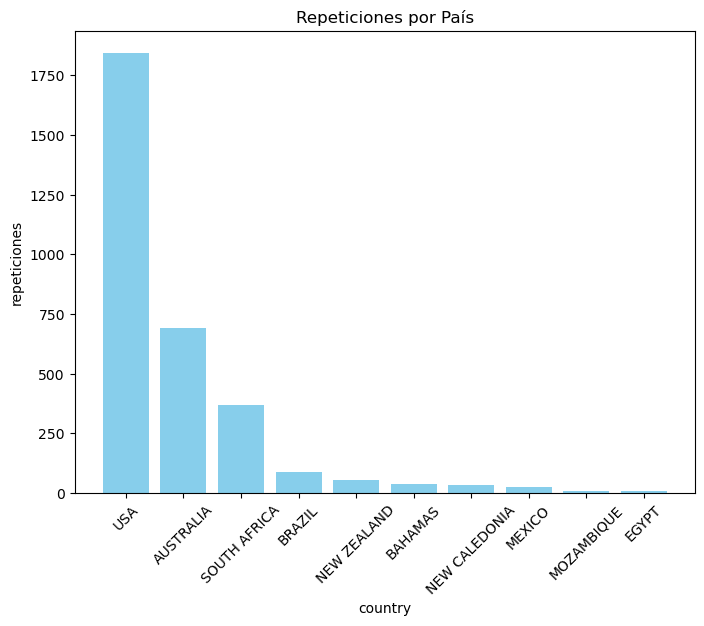

In [92]:
#Diagrama de barras. 

# Crear gráfico de barras
plot.figure(figsize=(8, 6))
plot.bar(country_attack_level['country'], country_attack_level['attacks'], color='skyblue')

# Añadir etiquetas y título
plot.xlabel('country')
plot.ylabel('repeticiones')
plot.title('Repeticiones por País')
plot.xticks(rotation=45)

# Mostrar gráfico
plot.show()